<a href="https://colab.research.google.com/github/MohamedKKhalaf/GANs/blob/main/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras import layers
import numpy as np

In [ ]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 10

In [ ]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)

z_log_sigma = layers.Dense(latent_dim)(h)
print(z_mean.shape)

(None, 10)


In [ ]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

In [ ]:
z = layers.Lambda(sampling)([z_mean, z_log_sigma])

# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           50240       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           650         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 10)           650         ['dense[0][0]']                  
                                                                                            

In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=10,
        batch_size=32)
        #validation_data=(x_test, x_test))

x_decoded = vae.predict(x_train)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 145.9161
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 116.6693
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 110.5294
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 107.1864
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 105.1027
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 103.6260
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 102.5468
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 101.7475
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 101.1092
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 100.6113


# **Decode a sample**

In [ ]:
z_zz_vae1 = encoder.predict(x_train)
print(z_zz_vae1[2].shape)
print(z_zz_vae1[2][0].shape)

x_decoded_vae_1 = decoder.predict(z_zz_vae1[2]+0.4)
x_decoded_vae_2 = decoder.predict(z_zz_vae1[0]+z_zz_vae1[1] * 0.6)

(60000, 10)
(10,)


# **plot the training samples**

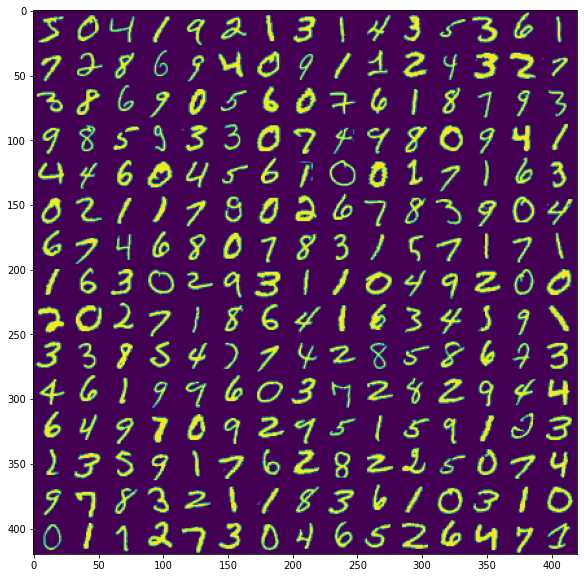

In [ ]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_train[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# **plot the original decoded samples**

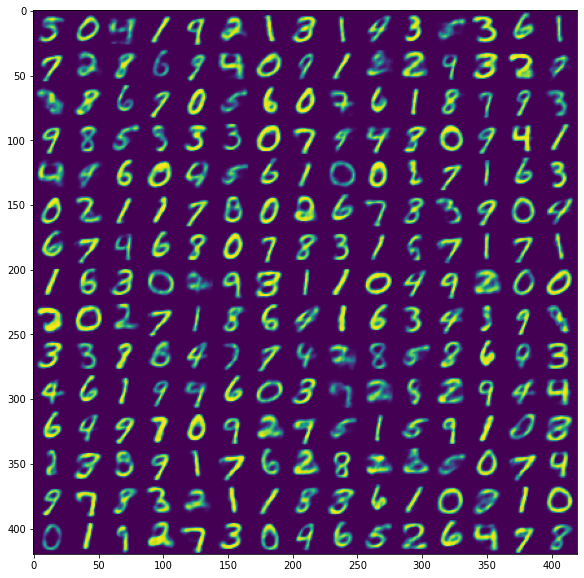

In [ ]:
import matplotlib.pyplot as plt
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)
        digit = x_decoded[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

(60000, 10)
(10,)


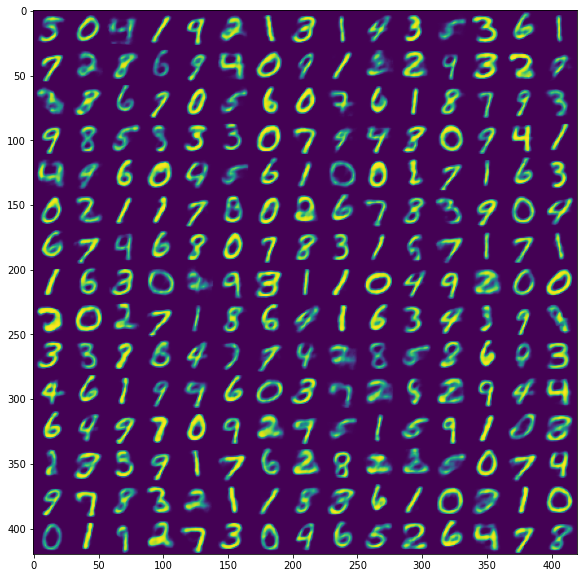

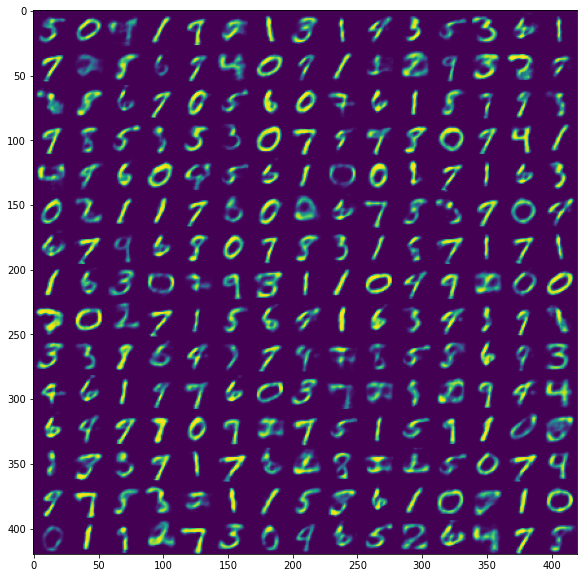

In [ ]:
import matplotlib.pyplot as plt
z_zz = encoder.predict(x_train)
print (z_zz[2].shape)
print (z_zz[2][0].shape)


x_decoded0 = decoder.predict(z_zz[2]+0.01)
x_decoded = decoder.predict(z_zz[0]+z_zz[1] * 0.4)

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)

        digit = x_decoded0[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()


# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)

        digit = x_decoded[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# **add different noise to the decoded samples**

In [ ]:
#when adding noise on a single sample the line gets bolder
x_decoded_changed1 = decoder.predict(z_zz[2]+0.4)
# x_decoded_changed1 = decoder.predict(z_zz[2]+1.2)
# x_decoded_changed1 = decoder.predict(z_zz[2]+0.04)

#when adding to samples the lines fade away
x_decoded_changed2 = decoder.predict(z_zz[0]+z_zz[1]*0.8)
# x_decoded_changed2 = decoder.predict(z_zz[0]+z_zz[1])

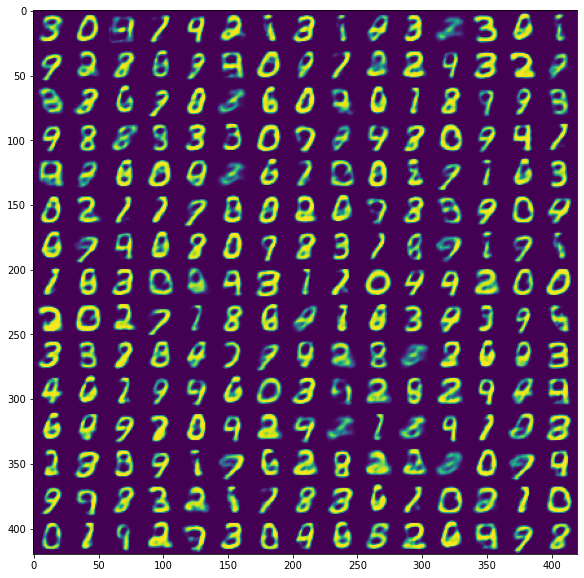

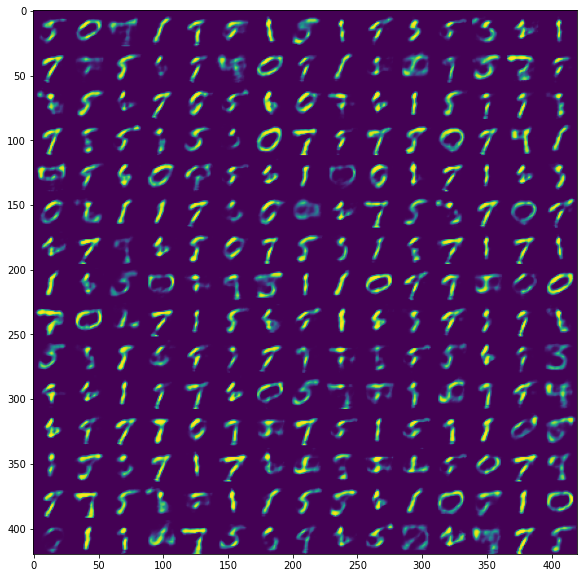

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):

        digit = x_decoded_changed1[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()


# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):

        digit = x_decoded_changed2[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# **Deeper Network**

In [ ]:
import keras
from keras import layers
# latent_dim = 40
latent_dim = 5

inputs_deep = keras.Input(shape=(original_dim,))
x = layers.Dense(intermediate_dim, activation='relu')(inputs_deep)
x = layers.Dense(32, activation='relu')(x)
z_mean_deep = layers.Dense(latent_dim)(x)

z_log_sigma_deep= layers.Dense(latent_dim)(x)
z_deep= layers.Lambda(sampling)([z_mean_deep, z_log_sigma_deep])
encoder_deep = keras.Model(inputs_deep, [z_mean_deep, z_log_sigma_deep, z_deep], name='encoder')
encoder_deep.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 dense_60 (Dense)               (None, 64)           50240       ['input_39[0][0]']               
                                                                                                  
 dense_61 (Dense)               (None, 32)           2080        ['dense_60[0][0]']               
                                                                                                  
 dense_62 (Dense)               (None, 5)            165         ['dense_61[0][0]']               
                                                                                            

In [ ]:
latent_inputs_deep = keras.Input(shape=(latent_dim,), name='z_sampling')
x3 = layers.Dense(32, activation='relu')(latent_inputs_deep)
x3 = layers.Dense(intermediate_dim, activation='relu')(x3)
outputs_deep = layers.Dense(original_dim, activation='sigmoid')(x3)
decoder_deep = keras.Model(latent_inputs_deep, outputs_deep, name='decoder')
decoder_deep.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 5)]               0         
                                                                 
 dense_64 (Dense)            (None, 32)                192       
                                                                 
 dense_65 (Dense)            (None, 64)                2112      
                                                                 
 dense_66 (Dense)            (None, 784)               50960     
                                                                 
Total params: 53,264
Trainable params: 53,264
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# instantiate VAE model
outputs_deep = decoder_deep(encoder_deep(inputs_deep)[2])
vae_deep = keras.Model(inputs_deep, outputs_deep, name='vae_mlp')

In [ ]:
reconstruction_loss3 = keras.losses.binary_crossentropy(inputs_deep, outputs_deep)
reconstruction_loss3 *= original_dim
kl_loss_deep = 1 + z_log_sigma_deep- K.square(z_mean_deep) - K.exp(z_log_sigma_deep)
kl_loss_deep = K.sum(kl_loss_deep, axis=-1)
kl_loss_deep *= -0.5
vae_loss_deep = K.mean(reconstruction_loss3 + kl_loss_deep)
vae_deep.add_loss(vae_loss_deep)

vae_deep.compile(optimizer='adam')

In [ ]:
vae_deep.fit(x_train, x_train,
        epochs=20,
        batch_size=32)


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 159.3881
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 131.8970
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 126.7701
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 124.2748
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 122.6085
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 121.2997
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 120.2195
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 119.3135
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 118.5577
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 117.9244
Epoch 11/20
1875/1875 [==============================] - 5s 3ms/step - loss: 117.3747
Epoch 12/20
1875/1875 [==============================] - 5s 3ms

In [ ]:
z_zz_vae_deep = encoder_deep.predict(x_train)

x_decoded_vae_deep1 = decoder_deep.predict(z_zz_vae_deep[2]+0.04)
x_decoded_vae_deep2 = decoder_deep.predict(z_zz_vae_deep[0]+z_zz_vae_deep[1] * 0.2)

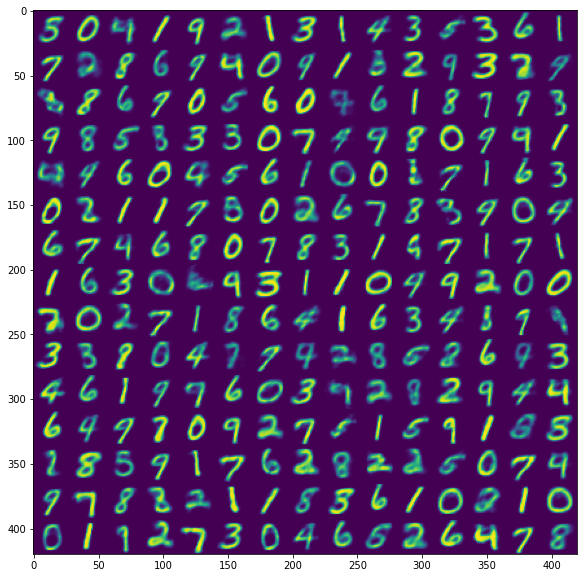

In [ ]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):

        digit = x_decoded_vae_deep1[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

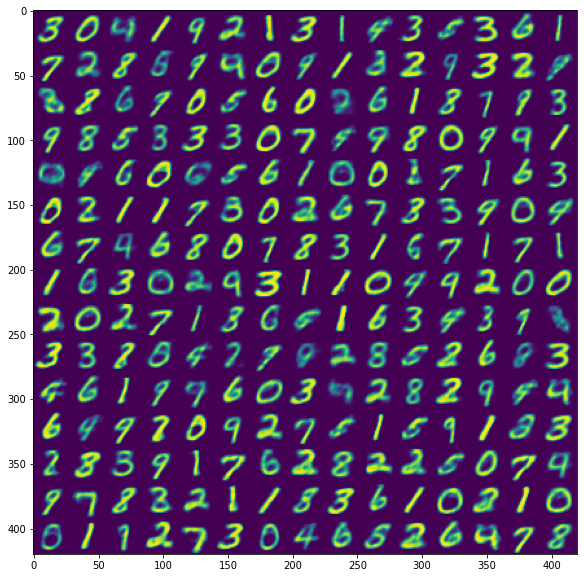

In [ ]:
import matplotlib.pyplot as plt

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        #z_sample = np.array([[xi, yi]])
        #x_decoded = decoder.predict(z_sample)

        digit = x_decoded_vae_deep2[k].reshape(digit_size, digit_size)
        k=k+1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()